# Lab-6 (25/04/2023)

# webscrapp http://books.toscrape.com book name, link, rating, price, print it and send it to database

In [26]:
import requests
from bs4 import BeautifulSoup
import pymongo
from IPython.display import HTML


client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["dem"]
books_collection = db["book"]

url = "https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html"

while True:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    articles = soup.find_all("article", {"class": "product_pod"})

    for article in articles:
       
        book_name = article.h3.a.text
        
        book_link = "https://books.toscrape.com/catalogue/" + article.h3.a["href"].replace("../", "")
       
        book_rating = article.p["class"][1]
        
        book_price = article.select("div p.price_color")[0].text

        
        book_dict = {
            "Book Name": book_name,
            "Book Link": book_link,
            "Book Rating": book_rating,
            "Book Price": book_price,
        }

        
        books_collection.insert_one(book_dict)

        
        print(f"Book Name: {book_name}")
        print(f"Book Link: {book_link}")
        print(f"Book Rating: {book_rating}")
        print(f"Book Price: {book_price}")
        print()

    
    next_button = soup.find("li", {"class": "next"})
    if next_button:
        
        url = url.rsplit('/', 1)[0] + "/" + next_button.a["href"]
    else:
        
        break

print("Book information saved to MongoDB.")


for book in books_collection.find():
    display(HTML(f"<h2>{book['Book Name']}</h2>"
                 f"<a href='{book['Book Link']}' target='_blank'>{book['Book Link']}</a>"
                 f"<p>Book Rating: {book['Book Rating']}</p>"
                 f"<p>Book Price: {book['Book Price']}</p>"))


Book Name: Tipping the Velvet
Book Link: https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
Book Rating: One
Book Price: £53.74

Book Name: Forever and Forever: The ...
Book Link: https://books.toscrape.com/catalogue/forever-and-forever-the-courtship-of-henry-longfellow-and-fanny-appleton_894/index.html
Book Rating: Three
Book Price: £29.69

Book Name: A Flight of Arrows ...
Book Link: https://books.toscrape.com/catalogue/a-flight-of-arrows-the-pathfinders-2_876/index.html
Book Rating: Five
Book Price: £55.53

Book Name: The House by the ...
Book Link: https://books.toscrape.com/catalogue/the-house-by-the-lake_846/index.html
Book Rating: One
Book Price: £36.95

Book Name: Mrs. Houdini
Book Link: https://books.toscrape.com/catalogue/mrs-houdini_821/index.html
Book Rating: Five
Book Price: £30.25

Book Name: The Marriage of Opposites
Book Link: https://books.toscrape.com/catalogue/the-marriage-of-opposites_759/index.html
Book Rating: Four
Book Price: £28.08

Book Name

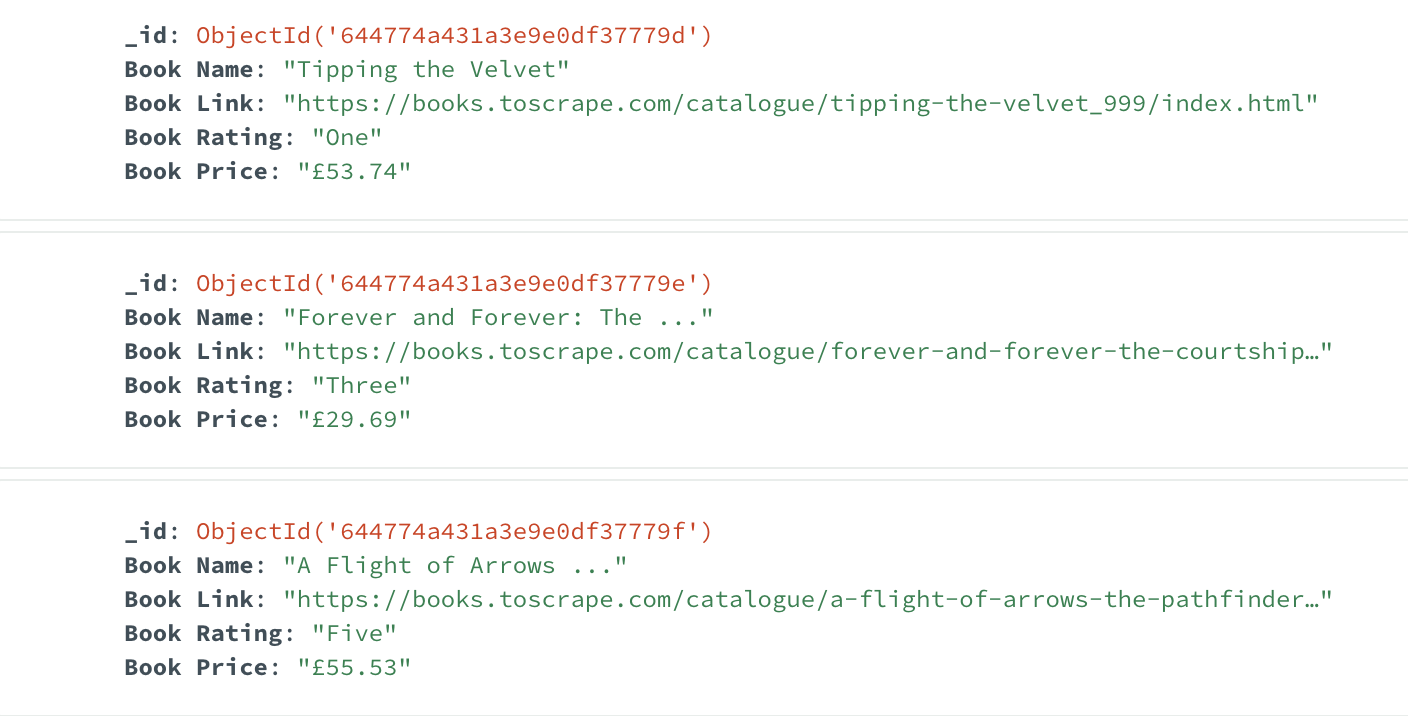

# Webscrape reddit

In [38]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://www.reddit.com/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
post_titles = soup.find_all('h3')
print()
with open('reddit_posts.csv', mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Post Title'])

    for title in post_titles:
        writer.writerow([title.text])


# Un-Attempted

In [36]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.reddit.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

post_containers = soup.find_all('div', {'class': 'Post'})

for container in post_containers:
    try:
        title = container.find('h3', {'class': 's1rydty-8'}).text.strip()
    except:
        title = 'N/A'
    try:
        likes = container.find('div', {'class': 's1rydty-9'}).text.strip()
    except:
        likes = 'N/A'
    try:
        comments = container.find('span', {'class': 's1rydty-11'}).text.strip()
    except:
        comments = 'N/A'
    try:
        shares = container.find('span', {'class': 's1rydty-10'}).text.strip()
    except:
        shares = 'N/A'
    
    print('Title:', title)
    print('Likes:', likes)
    print('Comments:', comments)
    print('Shares:', shares)
    print('---')


Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
Title: N/A
Likes: N/A
Comments: N/A
Shares: N/A
---
